In [25]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

PUNTO A 

In [26]:
States = np.array([0,1]) 
Prior =  np.array([0.2,0.8])

In [27]:
T = np.array([[0.8,0.2],[0.2,0.8]])

E = np.array([[0.5,0.9],[0.5,0.1]])

In [28]:
DictH = {0:'Justa',1:'Sesgada'}
DictH[0]

'Justa'

In [29]:
DictO = {0:'Cara',1:'Sello'}
DictO[1]

'Sello'

In [30]:
Obs = np.array([1,0,0,0,1,0,1,0])

In [31]:
def GetHiddenStates(States, N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
    
    print(CStates)
    return np.array(Permu)

In [32]:
HiddenStates = GetHiddenStates(States,8)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [33]:
HiddenStates

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [34]:
len(HiddenStates)

256

In [35]:
print(Obs)

[1 0 0 0 1 0 1 0]


In [38]:
def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0] ]
    
    for i in range(n-1):
        p *= T[ State[i+1], State[i] ]
    
    
    
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
    
    return p



PUNTO B

In [40]:
dim = HiddenStates.shape[0]
P = np.zeros(dim)

for i in range(dim):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)

print(P)

[1.63840000e-04 7.37280000e-05 2.04800000e-06 1.84320000e-05
 2.04800000e-06 1.84320000e-05 1.84320000e-05 1.84320000e-05
 3.27680000e-05 1.47456000e-05 8.29440000e-06 3.68640000e-06
 9.21600000e-07 2.56000000e-08 3.68640000e-06 8.29440000e-06
 2.30400000e-07 2.07360000e-06 3.68640000e-06 8.29440000e-06
 2.30400000e-07 2.07360000e-06 2.30400000e-07 3.31776000e-05
 8.29440000e-06 2.30400000e-07 2.07360000e-06 2.30400000e-07
 2.07360000e-06 3.31776000e-05 1.47456000e-05 4.09600000e-07
 3.68640000e-06 4.09600000e-07 3.68640000e-06 3.68640000e-06
 5.89824000e-05 2.65420800e-05 1.84320000e-07 1.65888000e-06
 7.37280000e-07 1.65888000e-06 9.33120000e-07 4.14720000e-07
 1.65888000e-06 4.60800000e-08 6.63552000e-06 1.65888000e-06
 9.33120000e-07 4.14720000e-07 1.03680000e-07 2.88000000e-09
 4.14720000e-07 1.49299200e-05 4.14720000e-07 3.73248000e-06
 6.63552000e-06 1.65888000e-06 9.33120000e-07 4.14720000e-07
 1.03680000e-07 2.88000000e-09 4.14720000e-07 9.33120000e-07
 2.59200000e-08 2.332800

In [15]:
PObs = np.sum(P)
print(PObs)

0.0019344381513984013


In [16]:
maxP = np.max(P)
ii = np.where( P == np.amax(P))
print(HiddenStates[ii],maxP)

[[1 1 1 1 0 0 0 0]] 0.0001911029760000001


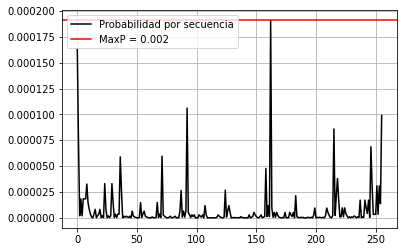

In [17]:
plt.plot(P,color='k', label="Probabilidad por secuencia")
plt.axhline(y=maxP, c="r",label="MaxP = 0.002")
plt.legend()
plt.grid(axis='both')

PUNTO C 

In [18]:
ObsStates = GetHiddenStates([0,1],8)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [41]:
NObs = ObsStates.shape[0]

PObs = np.zeros(NObs)

for j in range(NObs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
        
    PObs[j] = np.sum(P)
print(PObs)

[0.13698241 0.04114921 0.0347373  0.03175272 0.03026766 0.02932288
 0.02830811 0.02656789 0.02297818 0.01870516 0.01330002 0.01467809
 0.01079433 0.01067359 0.01276253 0.00956961 0.00877661 0.00936674
 0.01172117 0.00883478 0.00776184 0.00767971 0.00853533 0.01088136
 0.00811519 0.00697382 0.00661175 0.00679511 0.00764233 0.00970066
 0.00694603 0.00590355 0.00547305 0.00537647 0.00555143 0.00611094
 0.0074164  0.00955193 0.00649319 0.00616157 0.00733671 0.00505945
 0.00428819 0.00497251 0.00456283 0.0048075  0.00623446 0.00432462
 0.00337544 0.00382959 0.00321043 0.00330316 0.00416108 0.00372302
 0.00355961 0.00405611 0.00553322 0.00381405 0.00283376 0.00316972
 0.00249084 0.00251514 0.00309313 0.00256378 0.00241017 0.0026765
 0.00353481 0.00309969 0.00278698 0.0028754  0.00342205 0.00478004
 0.00319794 0.00231328 0.00256666 0.00193925 0.00193444 0.00234078
 0.00183427 0.00170131 0.00184945 0.00237437 0.00193054 0.00171671
 0.0017367  0.00200341 0.00268914 0.00229023 0.00199057 0.00192

In [20]:
len(PObs)

256

In [21]:
maxP2 = np.max(PObs)
ii = np.where( PObs == np.amax(PObs))
print(HiddenStates[ii],maxP2)

[[0 0 0 0 0 0 0 0]] 0.13698241367042568


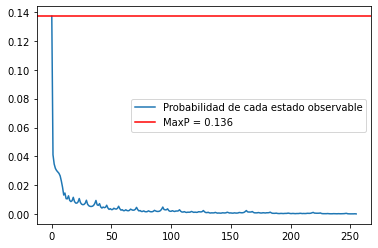

In [22]:
plt.plot(PObs)
plt.axhline(y = maxP2, c="r")
plt.legend(["Probabilidad de cada estado observable", "MaxP = 0.136"])


In [23]:
maxP = np.max(PObs)
ii = np.where( PObs == np.amax(PObs))
print(ObsStates[ii],maxP)

[[0 0 0 0 0 0 0 0]] 0.13698241367042568


PUNTO D

In [70]:
np.sum(PObs)

1.0000000000000007

PUNTO E 

Depende el resultado de la probabilidad a priori?


Si, los resultados dependen de la probabilidad a priori. En el código podemos ver que esta probabilidad a priori es un valor importante a la hora de encontrar la secuencia oculta más probable y de calcular las probabilidades de la secuencia oculta más probable y de los estados observables. Entonces, si hacemos el experimento de cambiar los valores de la probabilidad a priori podemos ver un cambio en la secuencia oculta más probable, en la probabilidad de la secuencia oculta más probable y en las probabilidades de los estados observables. Los cambios más notables ocurren en la secuencia oculta más probable y en su probabilidad. En las probabilidades de los estados observables los cambios son mas leves pero aun así hay variaciones notables.